# Matplotalt Examples

In these examples we use ``generate_starter_alt_text`` and ``surface_alt_text`` to programatically generate and display image descriptions for four supported matplotlib figure types.

To export this notebook to HTML run the next cell or execude the command:

```
jupyter nbconvert --to html examples.ipynb
```

In [11]:
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
import seaborn as sns
import numpy as np
from pprint import pprint
import os

from matplotalt.matplotalt import *
from matplotalt.matplotalt_constants import *

OPENAI_API_KEY = os.environ.get("OPENAI_API_KEY")
AZURE_OPENAI_API_KEY = os.environ.get("AZURE_OPENAI_API_KEY")


In [7]:
import requests
r = requests.get("https://openaiglazko.openai.azure.com/openai/models?api-version=2023-05-15", headers={"api-key": AZURE_OPENAI_API_KEY})
print(r)

<Response [200]>


In [13]:
pprint(str(r._content))

('b\'{\\n  "data": [\\n    {\\n      "capabilities": {\\n        "fine_tune": '
 'false,\\n        "inference": true,\\n        "completion": false,\\n        '
 '"chat_completion": false,\\n        "embeddings": false\\n      },\\n      '
 '"lifecycle_status": "preview",\\n      "deprecation": {\\n        '
 '"inference": 1721001600\\n      },\\n      "id": "dall-e-3-3.0",\\n      '
 '"status": "succeeded",\\n      "created_at": 1691712000,\\n      '
 '"updated_at": 1691712000,\\n      "object": "model"\\n    },\\n    {\\n      '
 '"capabilities": {\\n        "fine_tune": false,\\n        "inference": '
 'true,\\n        "completion": false,\\n        "chat_completion": '
 'false,\\n        "embeddings": false\\n      },\\n      "lifecycle_status": '
 '"preview",\\n      "deprecation": {\\n        "inference": '
 '1721001600\\n      },\\n      "id": "dall-e-2-2.0",\\n      "status": '
 '"succeeded",\\n      "created_at": 1713139200,\\n      "updated_at": '
 '1713139200,\\n      "objec

In [ ]:
get_openai_vision_response()

In [22]:
from matplotalt.chart_descriptions import *

CHART_TYPE_TO_CLASS = {
    "line": LineDescription,
    "scatter": ScatterDescription,
    "bar": BarDescription,
    "heatmap": HeatmapDescription,
    "boxplot": BoxplotDescription,
    "sankey": SankeyDescription,
    "radial": RadialDescription,
    "pie": PieDescription,
    "strip": StripDescription,
    "choropleth": ChoroplethDescription,
    "contour": ContourDescription
}

def get_api_chart_type_test(api_key, model="gpt-4-vision-preview", use_azure=False):
    fig = plt.gcf()
    fig.canvas.draw()
    pil_img = Image.frombytes('RGB', fig.canvas.get_width_height(), fig.canvas.tostring_rgb())
    base64_img = pillow_image_to_base64_string(pil_img)
    prompt = f"You are an expert at classifying charts into one of {len(CHART_TYPE_TO_CLASS)} types: {format_list(list(CHART_TYPE_TO_CLASS.keys()))}. What is the type of this chart? Answer with at most three words."
    #print(prompt)
    api_response =  get_openai_vision_response(api_key, prompt, base64_img, model=model,
                                               use_azure=use_azure, max_tokens=5,
                                               return_full_response=False)
    return api_response


def get_openai_response(api_key, prompt, model="gpt-4-vision-preview", use_azure=False,
                               max_tokens=300, return_full_response=False):
    if use_azure:
        client = AzureOpenAI(api_key=api_key,
                             api_version=os.getenv("OPENAI_API_VERSION"),
                             azure_endpoint=os.getenv("AZURE_OPENAI_ENDPOINT"))
    else:
        client = OpenAI(api_key=api_key)
    response = client.chat.completions.create(
        model=model,
        messages=[
            {
            "role": "user",
            "content": [
                {"type": "text", "text": prompt},
            ],
            }
        ],
        max_tokens=max_tokens
    )
    if return_full_response:
        return response
    return response.choices[0].message.content

## Line chart

In the next cell, we first create a plot with two lines for the average number of bikes that cross fremont bridge and hours of sunshine each month as a percent difference from the yearly average. The goal of this visualization is to show that these two variables are correlated throughout the year. 

To create starter alt text for the figure, we call ``generate_starter_alt_text`` with the chart_type="line", and stats=["max", "mean"], which returns a string. The function can automatically infer the chart type from its proerties, but it's accuracy is not great. By specifying the "max" and "mean" stats, our alt text will include information about those statistis for each line. We then pass the output of the ``generate_starter_alt_text`` function to ``surface_alt_text`` with the parameter methods=["markdown"]. This function displays the alt text string as markdown output of the same cell it's called from.

The other options for displaying alt text with ``surface_alt_text`` are:
- "new_cell": create a new cell after this one containing the alt text in a python comment
- "html_alt": display the figure as an html object with the alt text included in the alt property
- "txt_file": save the alt text to an external text file at the parameter output_file

Data for the raw number of bikes and sunshine hours is included in the table below:

| Month | Avg. Hours of Sunshine | Avg. Number of Bikes that Cross Fremont bridge |
| ----- |------------------------|----------------------------------------------- |
| Jan.  | 69                     | 112252.8
| Feb.  | 108                    | 103497.2
| Mar.  | 178                    | 136189.2
| Apr.  | 207                    | 165020.4
| May   | 253                    | 231792
| June  | 268                    | 221274.8
| July  | 312                    | 234421.6
| Aug.  | 281                    | 224087.2
| Sep.  | 221                    | 190238
| Oct.  | 142                    | 166078
| Nov.  | 72                     | 121548
| Dec.  | 52                     | 89695.6


NotFoundError: Error code: 404 - {'error': {'code': 'DeploymentNotFound', 'message': 'The API deployment for this resource does not exist. If you created the deployment within the last 5 minutes, please wait a moment and try again.'}}

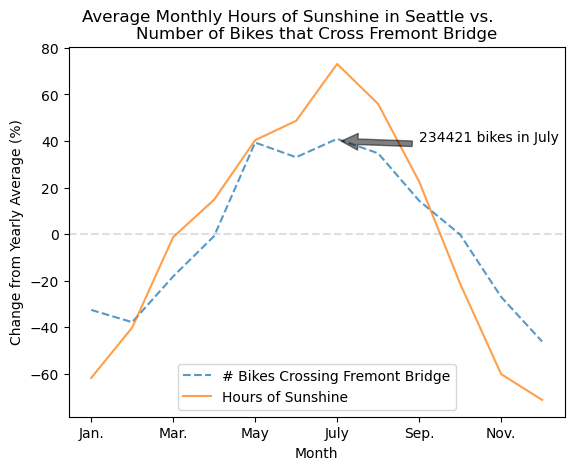

In [24]:
# (1) Line Chart
# --------------------------------------
# Bike count averaged over 2014-2018 from the Freemont Bridge Bicycle Counter (https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k)
bikes_over_fremont_bridge = np.array([112252.8, 103497.2, 136189.2, 165020.4, 231792, 221274.8,
                                      234421.6, 224087.2, 190238, 166078, 121548, 89695.6])
sunshine_hours = np.array([69, 108, 178, 207, 253, 268, 312, 281, 221, 142, 72, 52])
avg_bikes = np.mean(bikes_over_fremont_bridge)
avg_hours = np.mean(sunshine_hours)
normalized_bikes = 100 * (bikes_over_fremont_bridge - avg_bikes) / avg_bikes
normalized_sunshine = 100 * (sunshine_hours - avg_hours) / avg_hours

months = ["Jan.", "Feb.", "Mar.", "Apr.", "May", "June",
          "July", "Aug.", "Sep.", "Oct.", "Nov.", "Dec."]

plt.title("Average Monthly Hours of Sunshine in Seattle vs. \
          \nNumber of Bikes that Cross Fremont Bridge")
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.25)
plt.plot(normalized_bikes, ls="--", label="# Bikes Crossing Fremont Bridge", alpha=0.75)
plt.plot(normalized_sunshine, label="Hours of Sunshine", alpha=0.75)
plt.xticks(ticks=list(range(0, 11, 2)), labels=months[::2])
plt.xlabel("Month")
plt.ylabel("Change from Yearly Average (%)")
plt.annotate('234421 bikes in July', xy=(6, 40), xytext=(8, 40), arrowprops=dict(facecolor='black', shrink=0.05, alpha=0.5))
plt.legend()

AZURE_OPENAI_API_KEY = os.environ.get("AZURE_OPENAI_API_KEY")
#show_with_ai_alt(OPENAI_API_KEY, methods=["html_alt", "markdown"])
print(get_openai_response(AZURE_OPENAI_API_KEY, "testing", use_azure=True, model="TURBO"))

## Bar Chart

In the next cell, we create a bar chart using the data for the number of bikes that cross the fremont bridge each month. We generate starter alt text in the same way, and surface it using methods=["new_cell"]. This generates a new cell with the alt text in a python comment.

Bar chart


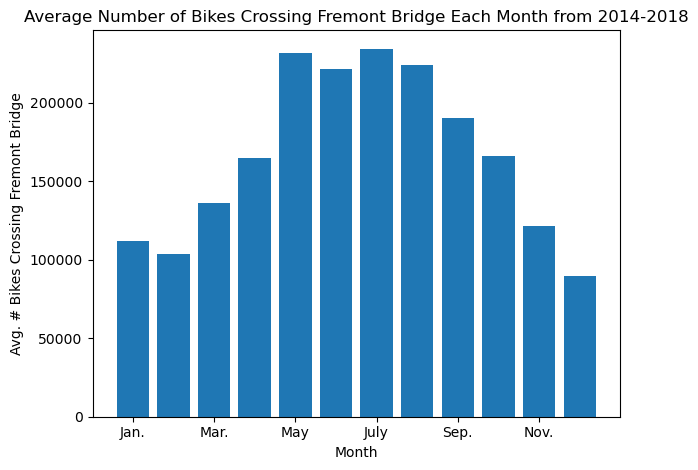

In [8]:
# (2) Bar chart
# --------------------------------------
# Bike count averaged over 2014-2018 from the Freemont Bridge Bicycle Counter (https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k)
bikes_over_fremont_bridge = np.array([112252.8, 103497.2, 136189.2, 165020.4, 231792, 221274.8,
                                      234421.6, 224087.2, 190238, 166078, 121548, 89695.6])
fig, ax = plt.subplots()
ax.set_title("Average Number of Bikes Crossing Fremont Bridge Each Month from 2014-2018")
ax.bar(list(range(12)), bikes_over_fremont_bridge)
ax.set_ylabel("Avg. # Bikes Crossing Fremont Bridge")
ax.set_xlabel("Month")
ax.set_xticks(ticks=list(range(0, 12, 2)), labels=months[::2])

plt.tight_layout()
# You can also seperate out calls to generate and surface alt text:
#starter_alt = generate_api_alt_text(OPENAI_API_KEY, desc_level=3)
#surface_alt_text(starter_alt, methods=["markdown", "html_alt"])
print(get_api_chart_type_test(OPENAI_API_KEY))

Pie chart


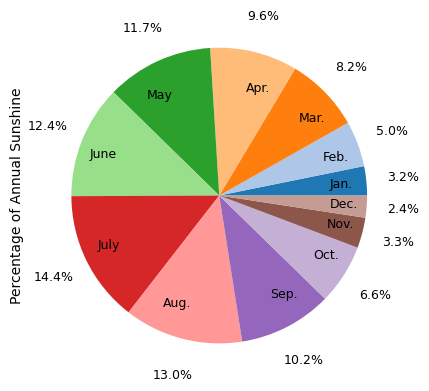

In [9]:
cmap = plt.cm.tab20
colors = cmap(list(range(12)))
plt.pie(sunshine_hours, labels=months, autopct='%1.1f%%', pctdistance=1.25,
                        labeldistance=0.75, colors=colors, textprops={'fontsize': 9})
plt.ylabel("Percentage of Annual Sunshine")

#show_with_ai_alt(OPENAI_API_KEY, methods=["html_alt", "markdown"], desc_level=2)
print(get_api_chart_type_test(OPENAI_API_KEY))

## Scatterplot

In the next cell we do the same for a scatterplot of samples from a 2d gaussian distribution. We surface the alt text with the "html_alt" method, which embeds it in the alt property. Note that no alt text is displayed in the cell.

Scatter plot


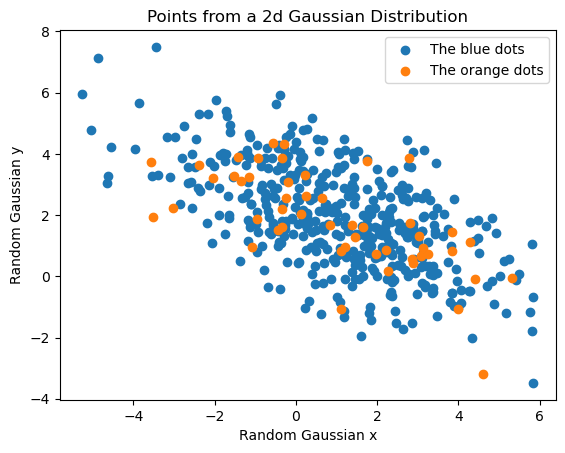

In [10]:
# (3) Scatterplot
# --------------------------------------
random_gaussian_2d = np.random.multivariate_normal([1, 2], [[4, -2], [-2, 3]], size=500)
plt.scatter(random_gaussian_2d[50:, 0], random_gaussian_2d[50:, 1], label="The blue dots")
plt.scatter(random_gaussian_2d[:50, 0], random_gaussian_2d[:50, 1], label="The orange dots")
plt.title("Points from a 2d Gaussian Distribution")
plt.xlabel("Random Gaussian x")
plt.ylabel("Random Gaussian y")
plt.legend()

#show_with_ai_alt(OPENAI_API_KEY, methods=["html_alt", "markdown"], desc_level=3)
print(get_api_chart_type_test(OPENAI_API_KEY))

Strip chart


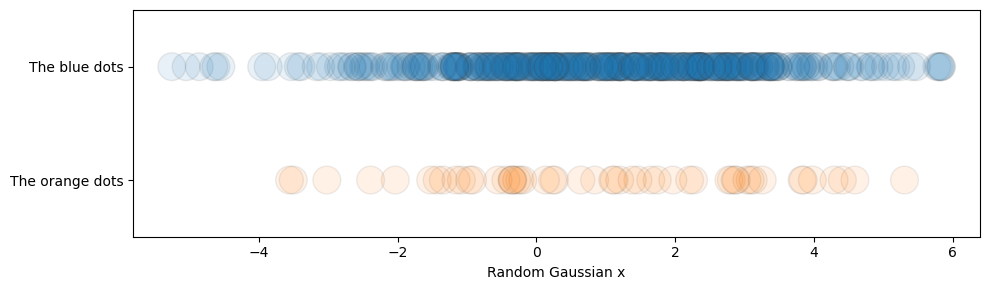

In [11]:
sns.stripplot([random_gaussian_2d[50:, 0], random_gaussian_2d[:50, 0]],
              jitter=False, size=20, linewidth=1, alpha=0.10, orient="h")
plt.gcf().set_size_inches(10, 3)
plt.xlabel("Random Gaussian x")
plt.yticks(ticks=[0, 1], labels=["The blue dots", "The orange dots"])
plt.tight_layout()

#show_with_ai_alt(OPENAI_API_KEY, methods=["html_alt", "markdown"])
print(get_api_chart_type_test(OPENAI_API_KEY))

## Heatmap

In this section we generate alt text for a heatmap. Our data is from an experiment in natural language processing where we train a language model on text from one time and evaluate it on text from other times. The values for each train/test time are the trained model's accuracy on some task using the test text.

In most cases, the alt text from ``generate_starter_alt_text`` is not sufficient to describe the figure alone. In this example, we add text to the returned string before it is surfaced to describe the trend that models do worse as their train and test times are further apart.

We then output the starter alt text plus context as markdown, and save it to the text file "time_heatmap_alt.txt"

Heatmap.


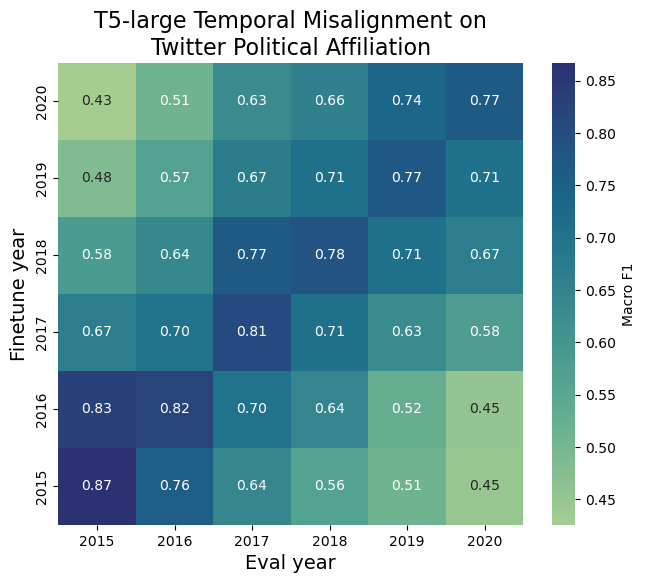

In [12]:
# (4) Heatmap
# --------------------------------------
t5_large_poli_aff_misalignment = np.array([
[0.8671,	0.7555,	0.6413,	0.5630,	0.5106,	0.4476],
[0.8293,	0.8206,	0.6999,	0.6448,	0.5244,	0.4542],
[0.6666,	0.6992,	0.8065,	0.7082,	0.6285,	0.5770],
[0.5841,	0.6379,	0.7664,	0.7826,	0.7068,	0.6665],
[0.4821,	0.5652,	0.6697,	0.7070,	0.7719,	0.7066],
[0.4256,	0.5089,	0.6284,	0.6578,	0.7353,	0.7696]])

fig, ax = plt.subplots(figsize=(7.5, 6))
ax.set_title("T5-large Temporal Misalignment on\nTwitter Political Affiliation", fontsize=16)
ax = sns.heatmap(t5_large_poli_aff_misalignment, ax=ax, annot=True, fmt=".2f",
                cmap="crest", cbar_kws={'label': 'Macro F1'})
ax.invert_yaxis()
ax.set_xlabel("Eval year", fontsize=14)
ax.set_ylabel("Finetune year", fontsize=14)
ax.set_yticklabels(list(range(2015, 2021)))
ax.set_xticklabels(list(range(2015, 2021)))

#show_with_ai_alt(OPENAI_API_KEY, methods=["html_alt", "markdown"], desc_level=4)
print(get_api_chart_type_test(OPENAI_API_KEY))


## Multiple Subplots

``generate_starter_alt_text`` can also handle figures with multiple subplots. In that case, it outputs the suptitle and then paragraphs containing the alt text for each subplot seperated by newlines.

In this example we have four line subplots displaying Anscombe's Quartet. Each line plot has the same mean, standard deviation, and line of fit, but have very different distributions. The second subplot, for example, looks similar to a parabola while the fourth has all its points at the same x position with a single outlier. This emphasizes the importantance of including context for each figure beyond the starter alt text because it does not communicate these differences.

x and y coordinates for each of the lines is in the tables below:

<table>
<tr><td>

| x123 | y1    | y2   | y3    |
|------|-------|------|-------|
| 10   | 8.04  | 9.14 | 7.46  |
| 8    | 6.95  | 8.14 | 6.77  |
| 13   | 7.58  | 8.74 | 12.74 |
| 9    | 8.81  | 8.77 | 7.11  |
| 11   | 8.33  | 9.26 | 7.81  |
| 14   | 9.96  | 8.10 | 8.84  |
| 6    | 7.24  | 6.13 | 6.08  |
| 4    | 4.26  | 3.10 | 5.39  |
| 12   | 10.84 | 9.13 | 8.15  |
| 7    | 4.82  | 7.26 | 6.42  |
| 5    | 5.68  | 4.74 | 5.73  |

</td><td>

| x4 | y4    |
|----|-------|
| 8  | 6.58  |
| 8  | 5.76  |
| 8  | 7.71  |
| 8  | 8.84  |
| 8  | 8.47  |
| 8  | 7.04  |
| 8  | 5.25  |
| 8  | 5.56  |
| 8  | 7.91  |
| 8  | 6.89  |
| 19 | 12.50 |

</td></tr> </table>

Scatter plot


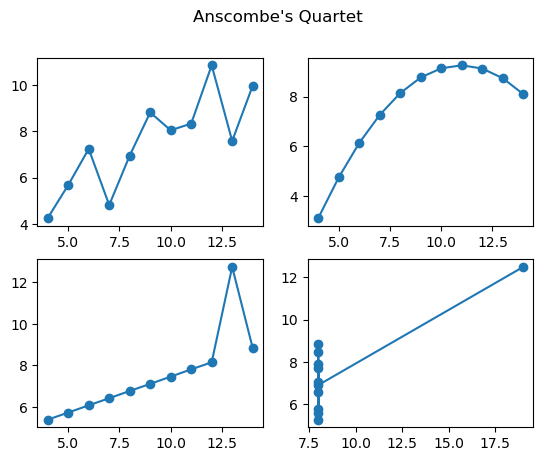

In [13]:
# (6) Multiple Subplots
# --------------------------------------
# Anscombe's quartet
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 19])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 5.56, 7.91, 6.89, 12.50])

x_order = np.argsort(x)

fig, axs = plt.subplots(2, 2)
fig.suptitle("Anscombe's Quartet")
axs[0][0].plot(x[x_order], y1[x_order], "-o")
axs[0][1].plot(x[x_order], y2[x_order], "-o")
axs[1][0].plot(x[x_order], y3[x_order], "-o")
axs[1][1].plot(x4, y4, "-o")

#show_with_ai_alt(OPENAI_API_KEY, methods=["html_alt", "markdown"], desc_level=4)
print(get_api_chart_type_test(OPENAI_API_KEY))

Boxplot


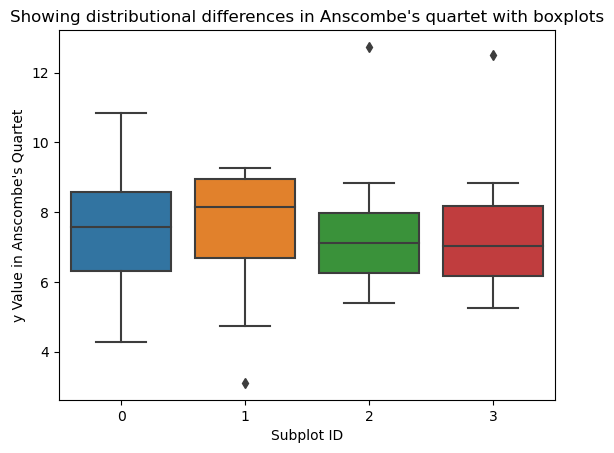

In [14]:
bp = sns.boxplot([y1, y2, y3, y4])
plt.ylabel("y Value in Anscombe's Quartet")
plt.xlabel("Subplot ID")
plt.title("Showing distributional differences in Anscombe's quartet with boxplots")

#show_with_ai_alt(OPENAI_API_KEY, methods=["html_alt", "markdown"], desc_level=4)
print(get_api_chart_type_test(OPENAI_API_KEY))

In [10]:
#os.system('jupyter nbconvert --to html ./examples.ipynb')

## Currently unsupported chart types:
- contour
- sankey
- radial

Contour chart.


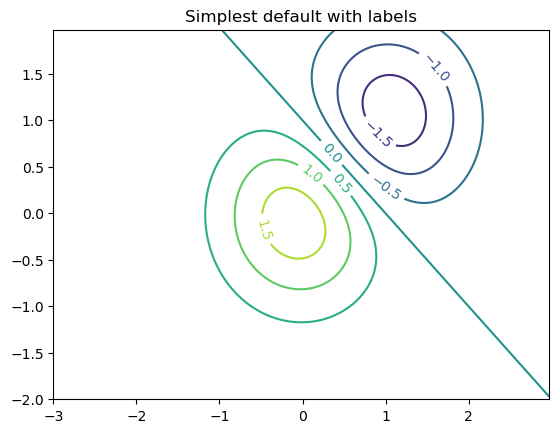

In [15]:
# Contour plot from the matplotlib docs: https://matplotlib.org/stable/gallery/images_contours_and_fields/contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Simplest default with labels')


#for child in plt.gca().get_children():
#    print(child, child.__dict__)


#show_with_ai_alt(OPENAI_API_KEY, methods=["html_alt", "markdown"])
print(get_api_chart_type_test(OPENAI_API_KEY))

Sankey diagram


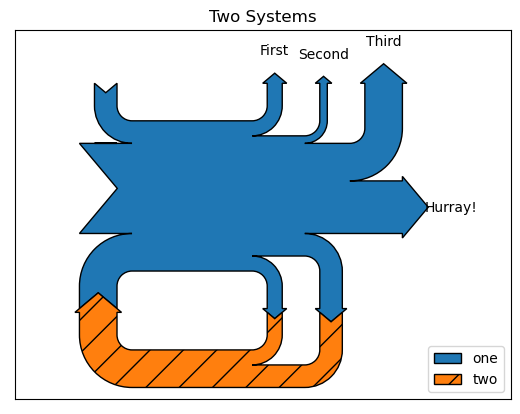

In [16]:
# Sankey diagram from the matplotlib docs: https://matplotlib.org/stable/api/sankey_api.html
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[], title="Two Systems")
sankey = matplotlib.sankey.Sankey(ax=ax, unit=None)
sankey.add(flows=[0.25, 0.15, 0.60, -0.10, -0.05, -0.25, -0.15, -0.10, -0.35], label='one',
           orientations=[-1, 1, 0, 1, 1, 1, -1, -1, 0],
           labels=['', '', '', 'First', 'Second', 'Third', '', '', 'Hurray!'])
sankey.add(flows=[-0.25, 0.15, 0.1], label='two',
           orientations=[-1, -1, -1], prior=0, connect=(0, 0))
diagrams = sankey.finish()
diagrams[-1].patch.set_hatch('/')
plt.legend()

#show_with_ai_alt(OPENAI_API_KEY, methods=["html_alt", "markdown"])
print(get_api_chart_type_test(OPENAI_API_KEY))

/var/folders/76/70fs0djn7lb2y98w5_hxbtx00000gn/T/ipykernel_39594/2046283758.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Radial chart.


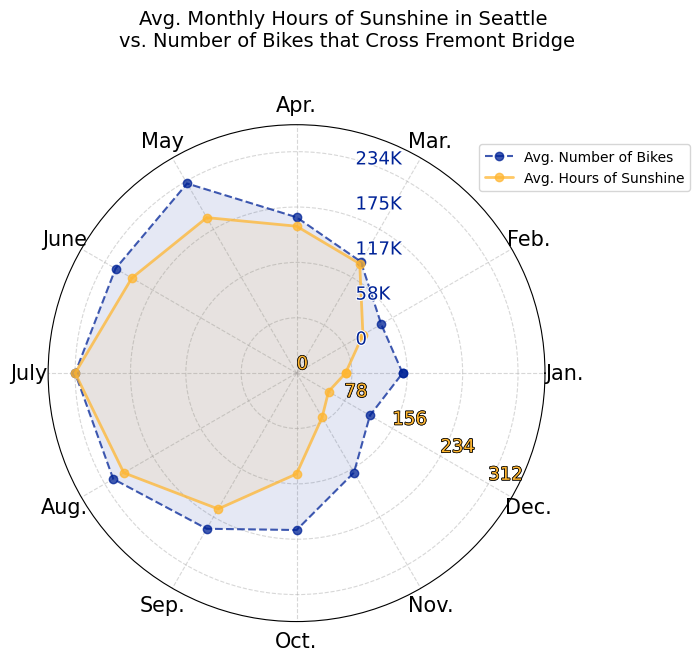

In [17]:
from matplotlib import patheffects
from scipy.interpolate import pchip

BIKE_COLOR = "#002397"
SUN_COLOR = "#FFB631"

# Convert bike and sunshine stats into radial coordinates
scaled_bike_rates = list(bikes_over_fremont_bridge * (np.amax(sunshine_hours) / np.amax(bikes_over_fremont_bridge)))
scaled_bike_rates.append(scaled_bike_rates[0])
monthnums = np.array(list(range(12)))
r = sunshine_hours
theta = (monthnums * np.pi) / 6
interp = pchip(theta, r)
tt = np.linspace(0, 2 * np.pi, 360)
r = list(sunshine_hours) + [sunshine_hours[0]]
theta = list(theta) + [theta[0]]
interptt = list(interp(tt)) + [interp(tt)[0]]
tt = list(tt) + [tt[0]]

def polar_twin(ax):
    ax2 = ax.figure.add_axes(ax.get_position(), projection='polar',
                             label='twin', frameon=False,
                             theta_direction=ax.get_theta_direction(),
                             theta_offset=ax.get_theta_offset())
    ax2.xaxis.set_visible(False)
    # Bit of a hack to ensure that the original axes tick labels are on top of
    # whatever is plotted in the twinned axes. Tick labels will be drawn twice.
    for label in ax.get_yticklabels():
        ax.figure.texts.append(label)
    return ax2

# Start building matplotlib figure
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
fig.suptitle("Avg. Monthly Hours of Sunshine in Seattle \nvs. Number of Bikes that Cross Fremont Bridge", fontsize=14)
# Configure twin axes
ax2 = polar_twin(ax)
ax.set_rticks(np.linspace(0, np.amax(r), 5))  # Reduce the number of radial ticks
ax2.set_yticks(ax.get_yticks())
bike_labels = (np.linspace(0, np.amax(bikes_over_fremont_bridge), 5).astype(int) // 1000).astype(str)
bike_labels = [l + "K" for l in bike_labels]
bike_labels[0] = "0"
ax2.set_yticklabels(bike_labels)
ax.set_rlabel_position(ax.get_rlabel_position())
ax2.set_rlabel_position(ax2.get_rlabel_position())
ax.set_rlabel_position(-30)
ax2.set_rlabel_position(90)
ax.tick_params(labelsize=13)
ax2.tick_params(labelsize=13)
# Add outside month labels
ax.set_xticks(np.arange(0,2.0*np.pi,np.pi/6.0))
ax.set_xticklabels(months, fontsize=15)
# Add dashed grid lines
ax.grid(True, alpha=0.5, linestyle="dashed")
ax2.grid(False)
ax.set_axisbelow(True)
plt.setp(ax2.get_yticklabels(), color=BIKE_COLOR)
plt.setp(ax.get_yticklabels(), color=SUN_COLOR)
ax2.set_ylim([0, 350])
ax.set_ylim([0, 350])

# Plot the radial lines and fills
ax.plot(theta, scaled_bike_rates, color=BIKE_COLOR, label="Avg. Number of Bikes",
        zorder=50, ls="--", marker="o", alpha=0.75)
ax.plot(theta, r, linewidth=2, color=SUN_COLOR, label='Avg. Hours of Sunshine',
        solid_capstyle='round', zorder=100, marker="o", alpha=0.75)
ax.fill_between(theta, scaled_bike_rates, facecolor=BIKE_COLOR, alpha=0.1, zorder=50)
ax.fill_between(theta, r, facecolor=SUN_COLOR, alpha=0.1, zorder=99)
ax.legend(loc="lower left", bbox_to_anchor=(.5 + np.cos(np.pi / 4)/2, .5 + np.sin(np.pi / 4)/2))

# Add outlines for the tick labels to increase contrast
for tick in (ax2.get_yticklabels()):
  tick.set_path_effects([patheffects.withStroke(linewidth=1.5, foreground='w')])
for tick in (ax.get_yticklabels()):
  tick.set_path_effects([patheffects.withStroke(linewidth=1, foreground='black')])
# Make sure ticks are drawn on top of lines and fills
ax.tick_params(zorder=200)
plt.gcf().set_size_inches(7, 7)
plt.tight_layout()

#show_with_ai_alt(OPENAI_API_KEY, methods=["html_alt", "markdown"])
print(get_api_chart_type_test(OPENAI_API_KEY))

In [14]:
os.system('jupyter nbconvert --to html ./ai_examples.ipynb')

[NbConvertApp] Converting notebook ./ai_examples.ipynb to html
[NbConvertApp] Writing 842177 bytes to ai_examples.html


0